In [1]:
import numpy as np

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from importlib import reload
from random import choice
reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durakGame = Game.DurakGame(numplayers, 'small')
trumpSuit = durakGame.playingField.trumpSuit
print(trumpSuit)

Diamonds


In [4]:
print(durakGame.playingField)

--- Playing Field ---
Drawing Deck: --- Card Collection ---
Cards: D0,D2,D3,D6,D7,C0,C3,C6,C7,H3,H6,H8.
Size: 12
-----------------------

Player 0:[[0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
Player 1:[[0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]]
Player 2:[[0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 1 0]]
Player 3:[[0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 1]]
Trump suit is Diamonds
---------------------



In [5]:
print(Cards.normal_hand(durakGame.players[0].hand, trumpSuit))

--- Card Collection ---
Cards: D8,C2,C4,C8,H4,S4.
Size: 6
-----------------------



In [23]:
p_att_idx = durakGame.playingField.playersOnAttack[0]
possibleAttacks = [i for i,v in np.ndenumerate(durakGame.playingField.get_legal_moves(p_att_idx)) if v == 1]
print(Cards.normal_hand(durakGame.players[p_att_idx].hand, trumpSuit))

--- Card Collection ---
Cards: C1,C5,H5,H7,S6,S7.
Size: 6
-----------------------



In [24]:
p_def_idx = durakGame.playingField.playerOnDefense

In [25]:
print('attack with:', Cards.normal_hand(durakGame.players[p_att_idx].hand, trumpSuit)[0])

attack with: C1


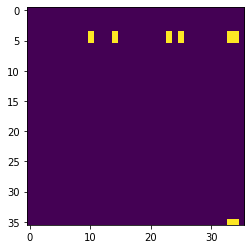

In [39]:
durakGame.playingField.attacks[possibleAttacks[0]] = 1
durakGame.playingField.attacks[possibleAttacks[1]] = 1
durakGame.playingField.attacks[possibleAttacks[2]] = 1
durakGame.playingField.attacks[possibleAttacks[3]] = 1
durakGame.playingField.attacks[possibleAttacks[4]] = 1
durakGame.playingField.attacks[possibleAttacks[5]] = 1
plt.imshow(durakGame.playingField.get_legal_moves(p_def_idx))

In [13]:
attack_idxs = np.flatnonzero(durakGame.playingField.attacks)
trump_attack_idxs = [i for i,v in enumerate(attack_idxs) if v < 9]
trump_attack_idxs

[]

In [15]:
print(Cards.normal_hand(durakGame.players[p_def_idx].hand,trumpSuit))

--- Card Collection ---
Cards: D4,D5,S0,S1,S2,S8.
Size: 6
-----------------------

